## Práctica Usar WORD2VEC



In [227]:
#Importamos librerias a utilizar 
from gensim.models import Word2Vec
from nltk.tokenize import TweetTokenizer
import nltk
import numpy as np
from sklearn.preprocessing import normalize 
 

In [228]:
def get_text_from_files(path_corpus):
    text = []
    with open(path_corpus, 'r', encoding='utf-8') as f_corpus:
        for line in f_corpus:
            line = line.strip().lower()
            text.append(line)
    return text

In [229]:
import pandas as pd
def pp(obj):
    print(pd.DataFrame(obj))

In [230]:
text = get_text_from_files('./mex20_train.txt')
corpus_tokenizado = []
tokenizer = TweetTokenizer()



In [231]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = set(stopwords.words('spanish'))
for tweet in text:
    tokens = tokenizer.tokenize(tweet)
    tokens = [token for token in tokens if token.isalpha() and token not in stop]
    corpus_tokenizado.append(tokens)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mateo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [232]:
model = Word2Vec(corpus_tokenizado, vector_size=10, window=5,min_count = 1,workers = 8)

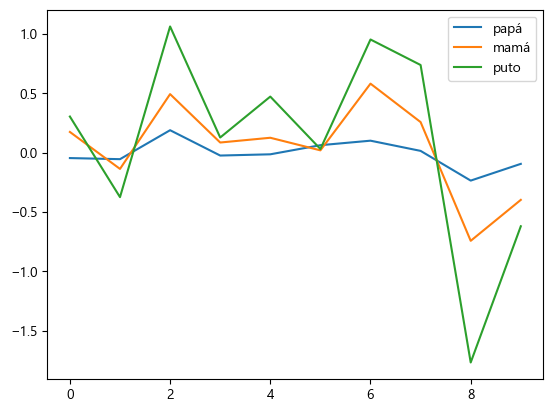

In [233]:
import matplotlib.pyplot as plt
plt.plot(model.wv['papá'], label = 'papá')
plt.plot(model.wv['mamá'],label = 'mamá')
plt.plot(model.wv['puto'],label = 'puto')
plt.legend()

In [234]:
def most_similar(word):
    return pp(model.wv.most_similar(word))

In [235]:
most_similar('puto')

         0         1
0   pinche  0.997440
1       si  0.997172
2    gorda  0.997102
3     joto  0.997055
4    putas  0.996488
5  alguien  0.996330
6  pinches  0.996235
7     solo  0.996185
8      mal  0.996146
9    putos  0.995890


In [236]:
most_similar('perro')

         0         1
0    pagar  0.960682
1  corazón  0.958662
2   espero  0.958509
3  primera  0.956522
4     rato  0.951521
5     casa  0.951495
6   tantas  0.949924
7   hombre  0.948727
8    todas  0.948654
9  momento  0.948396


In [258]:
most_similar('caca')

           0         1
0     camion  0.939911
1    gonzalo  0.905632
2    repasón  0.899809
3      mejía  0.899015
4  vestidazo  0.891876
5      azota  0.891694
6     abismo  0.891468
7   ocupamos  0.890662
8     engaña  0.879700
9    simpson  0.878049


In [237]:
pp(model.wv.most_similar(positive=['mal','bien']))

         0         1
0  pinches  0.998141
1    puede  0.998112
2       si  0.997828
3     años  0.997183
4    putos  0.996713
5    gorda  0.996686
6  alguien  0.996525
7   jajaja  0.996248
8     puto  0.996126
9   quiere  0.995992


In [238]:
def analogia(palabra1, palabra2, palabra3):
    return pp(model.wv.most_similar(positive=[palabra2, palabra3], negative=[palabra1]))

analogia('mexico', 'español', 'brasil')

            0         1
0   motolitas  0.947415
1         tie  0.867832
2     ternura  0.858902
3       chido  0.855248
4      mínima  0.847491
5     volvete  0.837171
6     chupale  0.836464
7      vacíos  0.834512
8        wang  0.831566
9  partidario  0.830274


In [239]:
all_tokens = [token for tweet in corpus_tokenizado for token in tweet]
fdist = nltk.FreqDist(all_tokens)


In [240]:

import numpy as np
def sort_freq(fdist):
    aux = [(fdist[key], key) for key in fdist]
    aux.sort(reverse=True) 
    return aux

mas_frequentes = sort_freq(fdist)

In [242]:
target_words = [word for freq, word in mas_frequentes[:2000] if word in model.wv]
words = [word for word in target_words if word in model.wv] 
target_matrix = np.array([model.wv[word] for word in target_words])

In [243]:
from sklearn.preprocessing import normalize
import numpy as np

target_matrix_normalized = normalize(target_matrix, norm='l2', axis=1)


In [245]:
from sklearn.manifold import TSNE
reduced_matrix = TSNE(n_components=2).fit_transform(target_matrix_normalized)

In [246]:
max_x = np.amax(reduced_matrix,axis=0)[0]
max_y = np.amax(reduced_matrix,axis=0)[1]


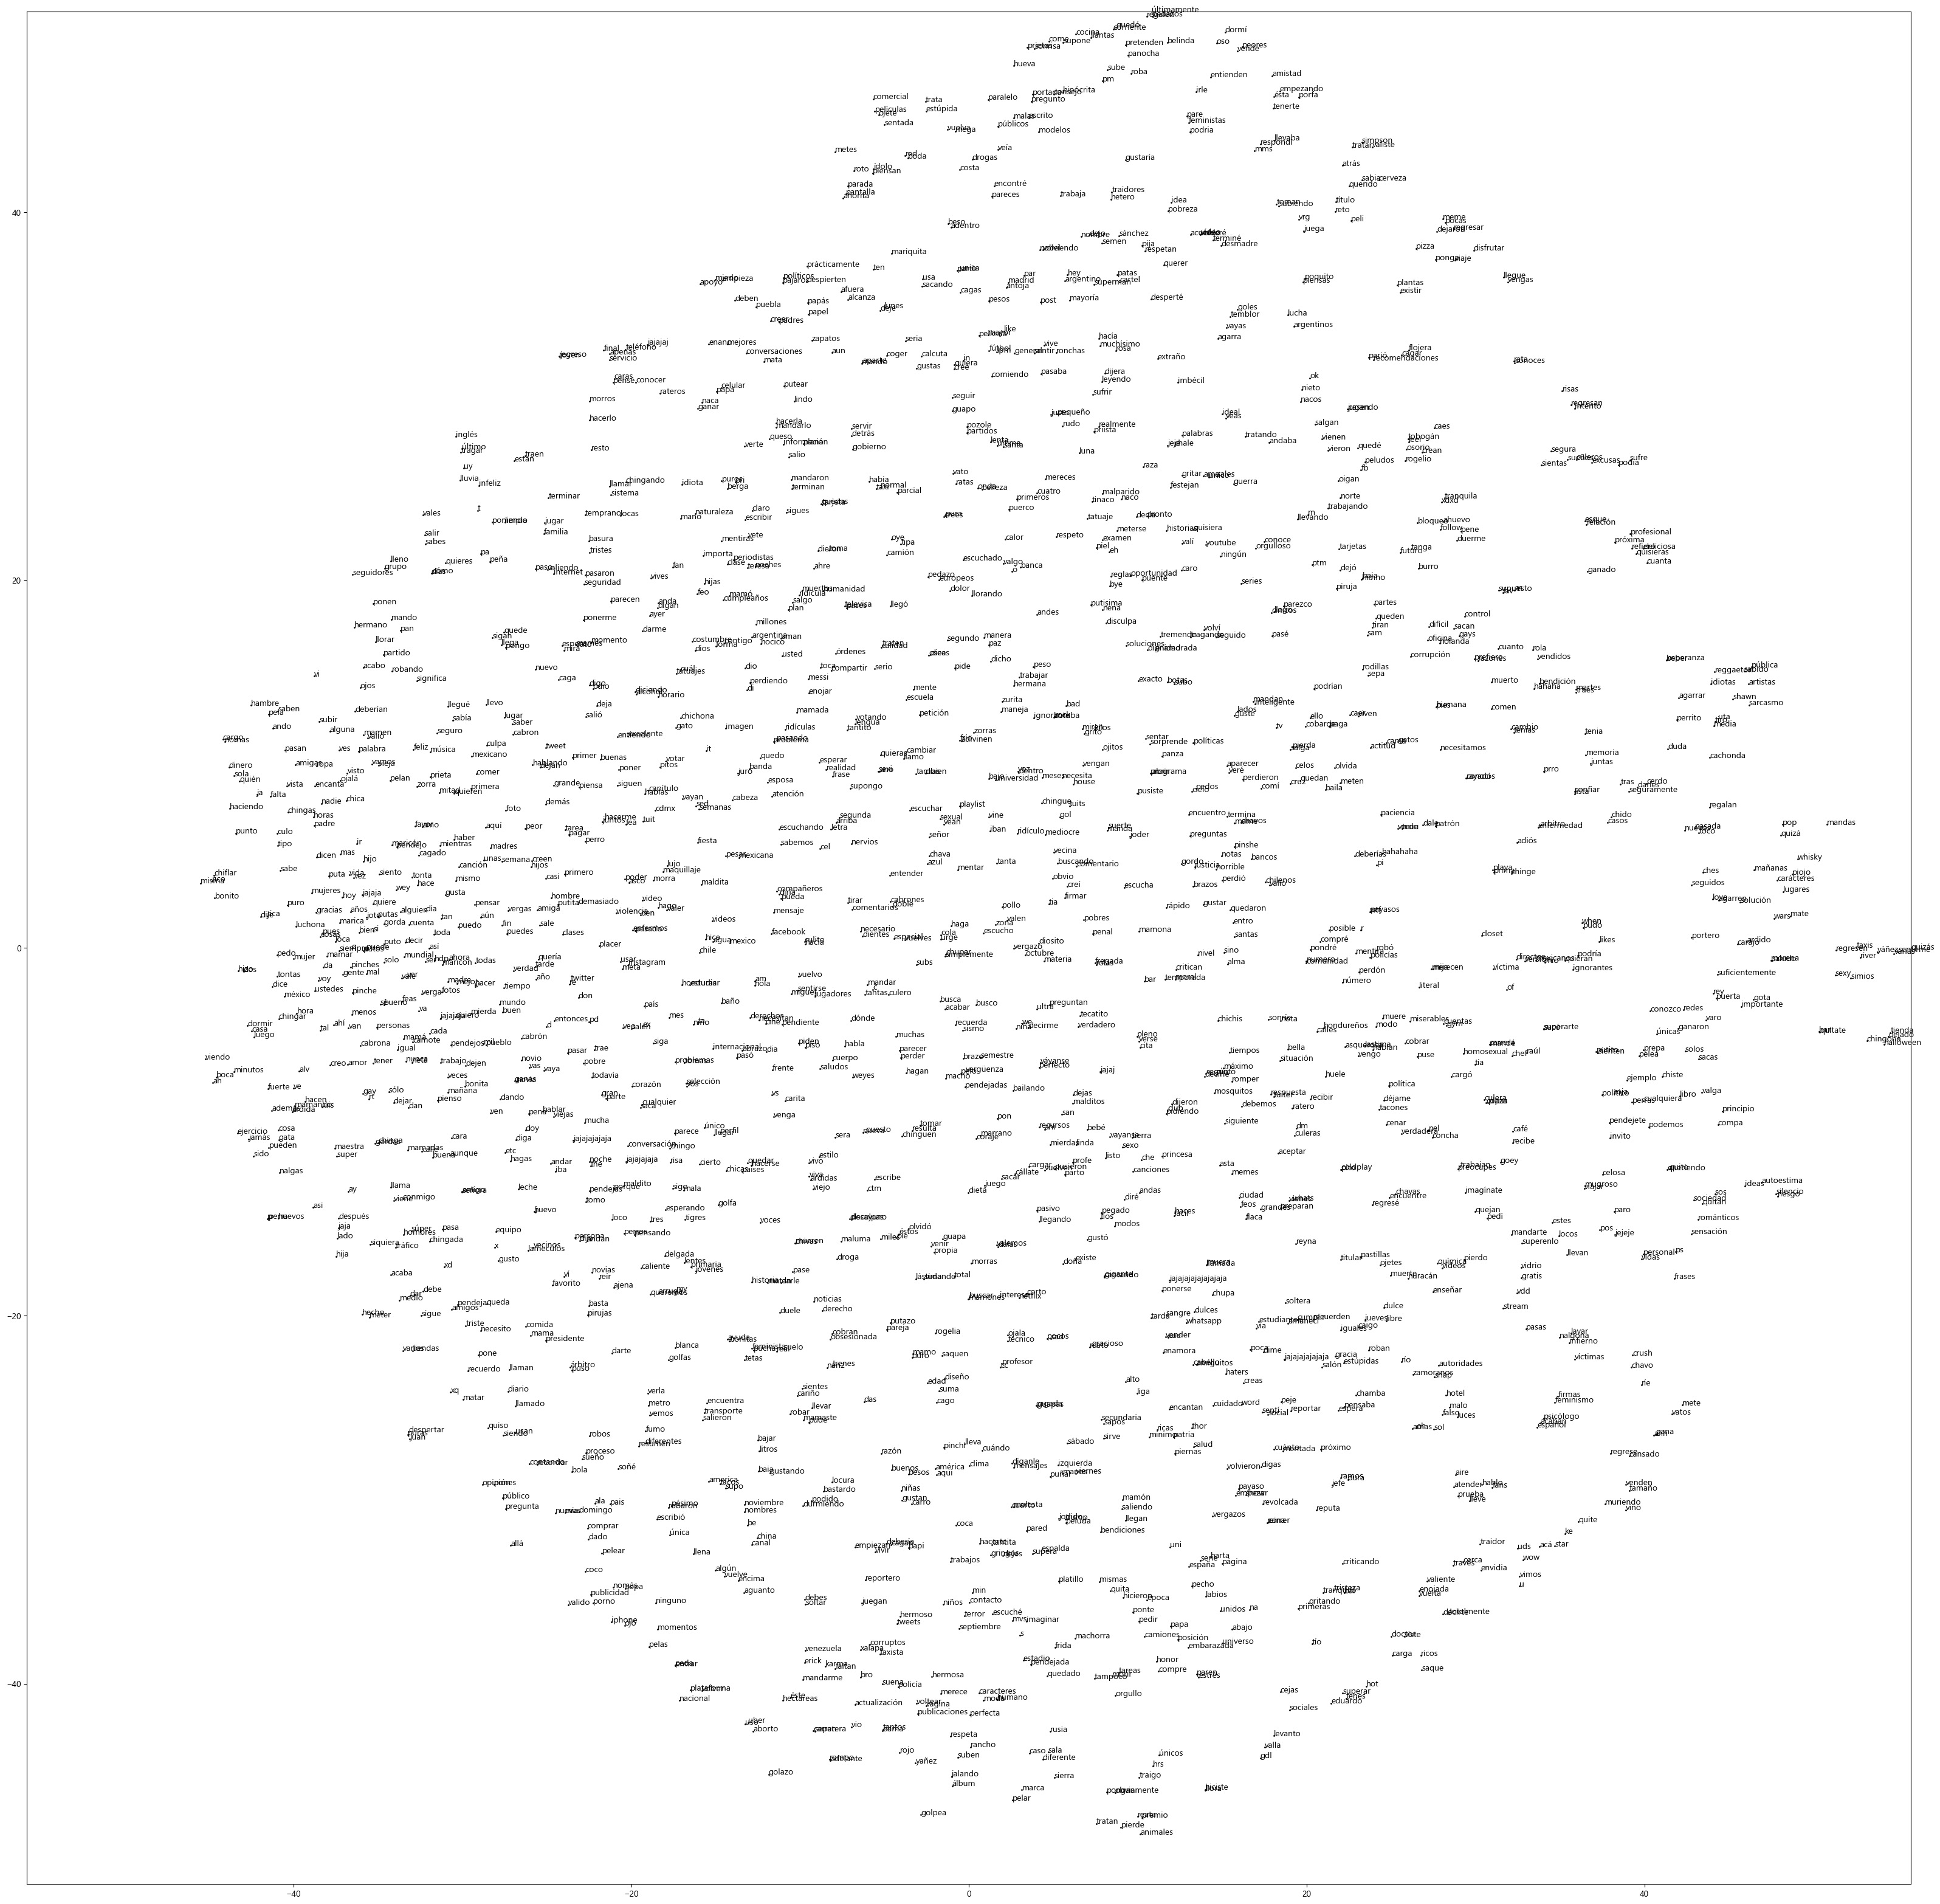

In [257]:

plt.rcParams['font.family'] = 'Segoe UI Emoji'
plt.figure(figsize=(40,40),dpi=100)
plt.xlim((-max_x,max_x))
plt.ylim((-max_y,max_y))
plt.scatter(reduced_matrix[:,0],reduced_matrix[:,1],1, color = 'black')

from nltk.corpus import stopwords
sw = set(stopwords.words('english'))
for idx, word in enumerate(words[:]):
    #coords para pintar la palabra
    x = reduced_matrix[idx, 0]
    y = reduced_matrix[idx, 1]
    


    plt.annotate(word,(x,y),color = 'black')